In [1]:
import pandas as pd

# read csv to df:
path_to_csv = '/home/itay.nakash/projects/smooth_language/results/df_same_sen_60'
df = pd.read_csv(path_to_csv)

In [2]:
K_FOR_CORR = 22
numeric_df = df.select_dtypes(include=["number"])

# calculate corr matrix:
corr_matrix = numeric_df.corr()

# get the correlation matrix of the similarity feature:
corr_matrix_sim=corr_matrix['sim']

# get the top_k by abs that corelate to the similarity:
largest_abs_values = corr_matrix_sim.abs().nlargest(K_FOR_CORR)
k_largest_values = corr_matrix_sim.loc[largest_abs_values.index]
print(k_largest_values)


sim                          1.000000
layer                       -0.410465
bertscore_m_f1               0.369946
bertscore_m_p                0.343877
bertscore_m_r                0.340058
logits1_pred_cl             -0.337851
logits2_pred_cl             -0.332436
logits1_masked_cl           -0.293100
logits2_masked_cl           -0.290352
sen_len2                    -0.237767
sen_len1                    -0.236058
softmax2_pred_cl            -0.187471
softmax1_pred_cl            -0.186986
softmax2_masked_cl          -0.133174
softmax1_masked_cl          -0.131120
logits1_pred_cl_no_norm     -0.128387
logits2_pred_cl_no_norm     -0.127802
logits1_masked_cl_no_norm   -0.117838
logits2_masked_cl_no_norm   -0.117229
index1                       0.052684
index2                       0.044893
bertscore_nm_f1             -0.039233
Name: sim, dtype: float64


In [3]:
# with Lasso - acts weird:

columns_list_without_sim = numeric_df.drop("sim", axis=1).columns.tolist()

# Import the pandas and LinearRegression modules
import pandas as pd
from sklearn.linear_model import Lasso

# Create a LinearRegression object
regressor = Lasso()

numeric_wout_sim= numeric_df.drop(columns=['sim'])

# Fit the regressor to the data
regressor.fit(numeric_wout_sim, numeric_df["sim"])

# Print the sorted weights and their corresponding column names
weights = sorted(zip(numeric_df.columns, regressor.coef_), key=lambda x: x[1], reverse=True)
for col, weight in weights:
    print(f"{col}: {weight}")

sen_len1: -0.0
sen_len2: -0.0
index1: 0.0
index2: 0.0
layer: -0.0
n_exampels: 0.0
sim: 0.0
std: 0.0
correct1: 0.0
correct2: -0.0
bertscore_nm_r: -0.0
bertscore_nm_p: -0.0
bertscore_nm_f1: 0.0
bertscore_m_r: 0.0
bertscore_m_p: 0.0
bertscore_m_f1: 0.0
logits1_masked: 0.0
logits1_pred: 0.0
softmax1_masked: 0.0
softmax1_pred: 0.0
logits2_masked: 0.0
logits2_pred: 0.0
softmax2_masked: 0.0
softmax2_pred: 0.0
logits1_masked_no_norm: -0.0
logits1_pred_no_norm: -0.0
softmax1_masked_no_norm: -0.0
softmax1_pred_no_norm: 0.0
logits2_masked_no_norm: -0.0
logits2_pred_no_norm: -0.0
softmax2_masked_no_norm: -0.0
softmax2_pred_no_norm: -0.0
logits1_masked_cl: -0.0
logits1_pred_cl: -0.0
softmax1_masked_cl: -0.0
softmax1_pred_cl: -0.0
logits2_masked_cl: -0.0
logits2_pred_cl: -0.0
softmax2_masked_cl: -0.0
softmax2_pred_cl: -0.0
logits1_masked_cl_no_norm: -0.0
logits1_pred_cl_no_norm: -0.0
softmax1_masked_cl_no_norm: 0.0
softmax1_pred_cl_no_norm: -0.0
logits2_masked_cl_no_norm: -0.0
logits2_pred_cl_no_nor

In [4]:
# Linear regression - when used lasso all weights were zero.

# create colums without the similarity: 
columns_list_without_sim = numeric_df.drop("sim", axis=1).columns.tolist()

# Import the pandas and LinearRegression modules
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object
regressor = LinearRegression()

numeric_wout_sim= numeric_df.drop(columns=['sim'])

# Fit the regressor to the data
regressor.fit(numeric_wout_sim, numeric_df["sim"])

# Print the sorted weights and their corresponding column names
weights = sorted(zip(numeric_df.columns, regressor.coef_), key=lambda x: x[1], reverse=True)
for col, weight in weights:
    print(f"{col}: {weight}")# Linear regression - when used lasso all weights were zero

bertscore_m_p: 20.336197804287636
logits2_pred_no_norm: 6.586388992221251
logits1_pred_no_norm: 4.32895976629766
bertscore_nm_r: 0.8145073858978542
correct2: 0.6117271487056511
softmax2_masked_no_norm: 0.2378136306371872
softmax1_masked_no_norm: 0.15562417333083356
softmax1_masked_cl_no_norm: 0.07235673600226501
logits2_pred_cl: 0.02302274667432565
softmax1_masked_cl: 0.019460111648137077
logits1_pred_cl: 0.01886894129588105
softmax2_masked_cl: 0.016552776772392346
softmax2_masked_cl_no_norm: 0.00566609769559448
logits1_masked_no_norm: 0.005399085021183027
logits2_masked_no_norm: 0.004844771966926401
softmax1_pred_cl_no_norm: 0.002467355196745164
std: 0.002136269902810842
bertscore_m_f1: 0.0014125855173061058
softmax1_pred: 0.0013776508367838293
softmax2_pred_cl: 0.0012697064829429092
logits2_pred: 0.0005871209592032873
logits2_masked: 0.00041519908501710305
logits1_masked: 0.0001540427823786088
index2: 3.49231099747918e-05
Unnamed: 0: 5.1198820723829e-08
sim: 1.1811079891899112e-11
n_

<AxesSubplot:>

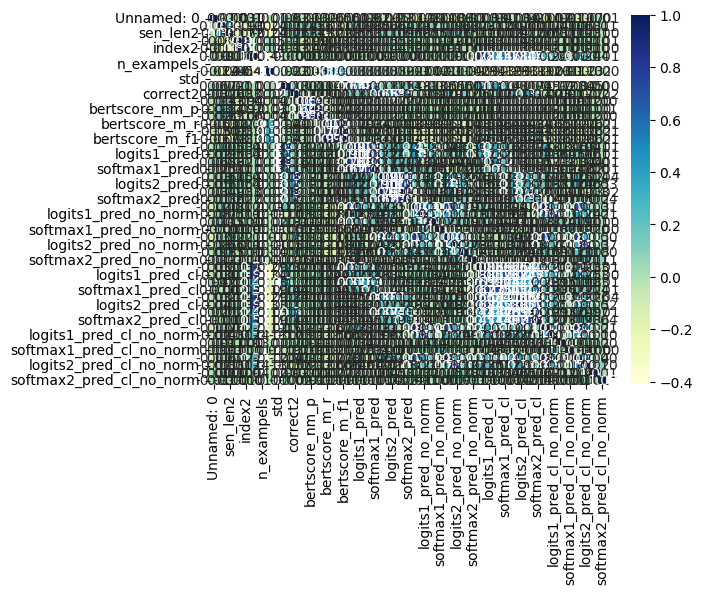

In [5]:
# too many features, not informative:

import seaborn as sns

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, 
            cmap="YlGnBu", 
            annot=True, 
            fmt=".2f")

<AxesSubplot:xlabel='softmax1_masked_cl', ylabel='sim'>

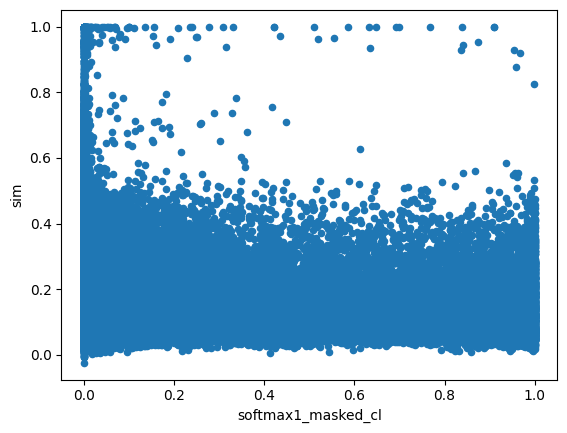

In [6]:
df.plot.scatter(x='softmax1_masked_cl',y='sim', cmap='viridis')

<AxesSubplot:xlabel='layer', ylabel='sim'>

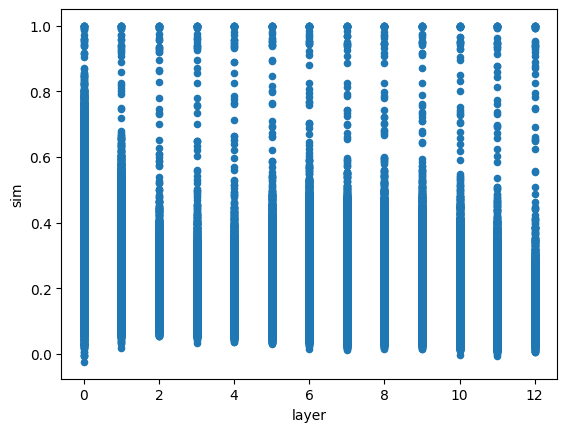

In [7]:
# thats a bit weird? why there are strict holes in spesific layers? there isn't any real pattern I think,
# so I'm not sure if its meaningful, but maybe can show how 'dicotomic' the model is in different layers?
df.plot.scatter(x='layer',y='sim', cmap='viridis')

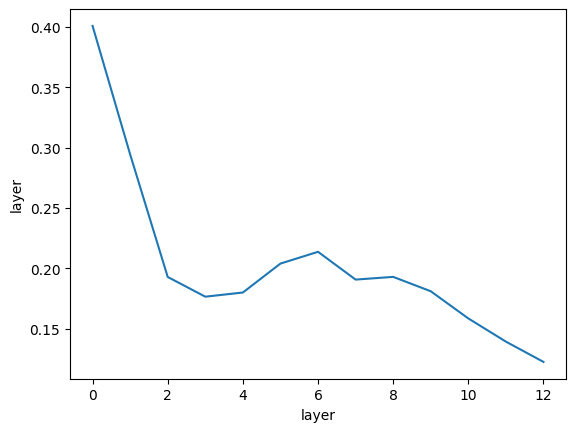

In [22]:
import matplotlib.pyplot as plt
mean_y_by_x = df.groupby('layer')['sim'].mean()

ax= mean_y_by_x.plot(x='layer',y='sim',kind='line')

ax.set_ylabel('layer')
plt.show()

<AxesSubplot:xlabel='bertscore_m_f1', ylabel='sim'>

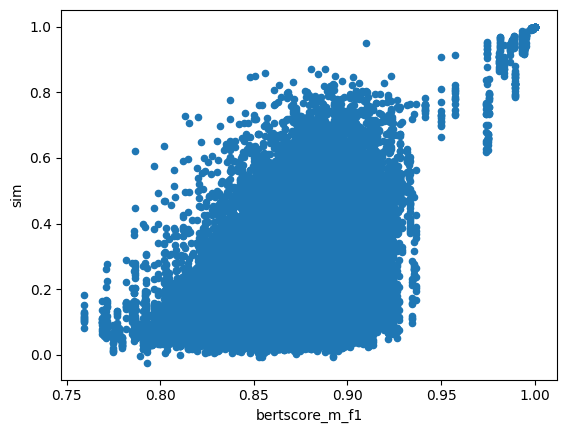

In [ ]:
df.plot.scatter(x='bertscore_m_f1',y='sim', cmap='viridis')